## Analyze Interpretability Data!

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/utils/')
# sys.path.append('/glade/u/home/wchapman/ENSOvsMJO/utils/')
from exp_hp import get_hp

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [22]:
EXP_NAME = 'default'
hps = get_hp(EXP_NAME)

LEADS = np.arange(7,31)
AVGS = np.arange(2,8)
SEEDS = np.arange(1,6)

## Contribution Analysis by Sign:

In [23]:
model1_fracpred_confcorr  = np.zeros(shape=(len(LEADS),len(AVGS),2,len(SEEDS)))
model2_fracpred_confcorr  = np.zeros(shape=(len(LEADS),len(AVGS),2,len(SEEDS)))
model12_fracpred_confcorr = np.zeros(shape=(len(LEADS),len(AVGS),2,len(SEEDS)))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/'

        finame_fracpred = 'model1_confcorrfracpred_bysign_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_confcorr[l,a,0] = np.load(ddir_load+finame_fracpred)[0]
        model1_fracpred_confcorr[l,a,1] = np.load(ddir_load+finame_fracpred)[1]
        finame_fracpred = 'model2_confcorrfracpred_bysign_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_confcorr[l,a,0] = np.load(ddir_load+finame_fracpred)[0]
        model2_fracpred_confcorr[l,a,1] = np.load(ddir_load+finame_fracpred)[1]
        finame_fracpred = 'model12_confcorrfracpred_bysign_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model12_fracpred_confcorr[l,a,0] = np.load(ddir_load+finame_fracpred)[0]
        model12_fracpred_confcorr[l,a,1] = np.load(ddir_load+finame_fracpred)[1]

model1_confcorrfracpred_avg  = np.mean(model1_fracpred_confcorr,axis=-1)
model2_confcorrfracpred_avg  = np.mean(model2_fracpred_confcorr,axis=-1)
model12_confcorrfracpred_avg = np.mean(model12_fracpred_confcorr,axis=-1)

LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11


FileNotFoundError: [Errno 2] No such file or directory: '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/model1_confcorrfracpred_bysign_LEAD_11_AVG_7__00001-00005.npy'

IndexError: index 5 is out of bounds for axis 1 with size 5

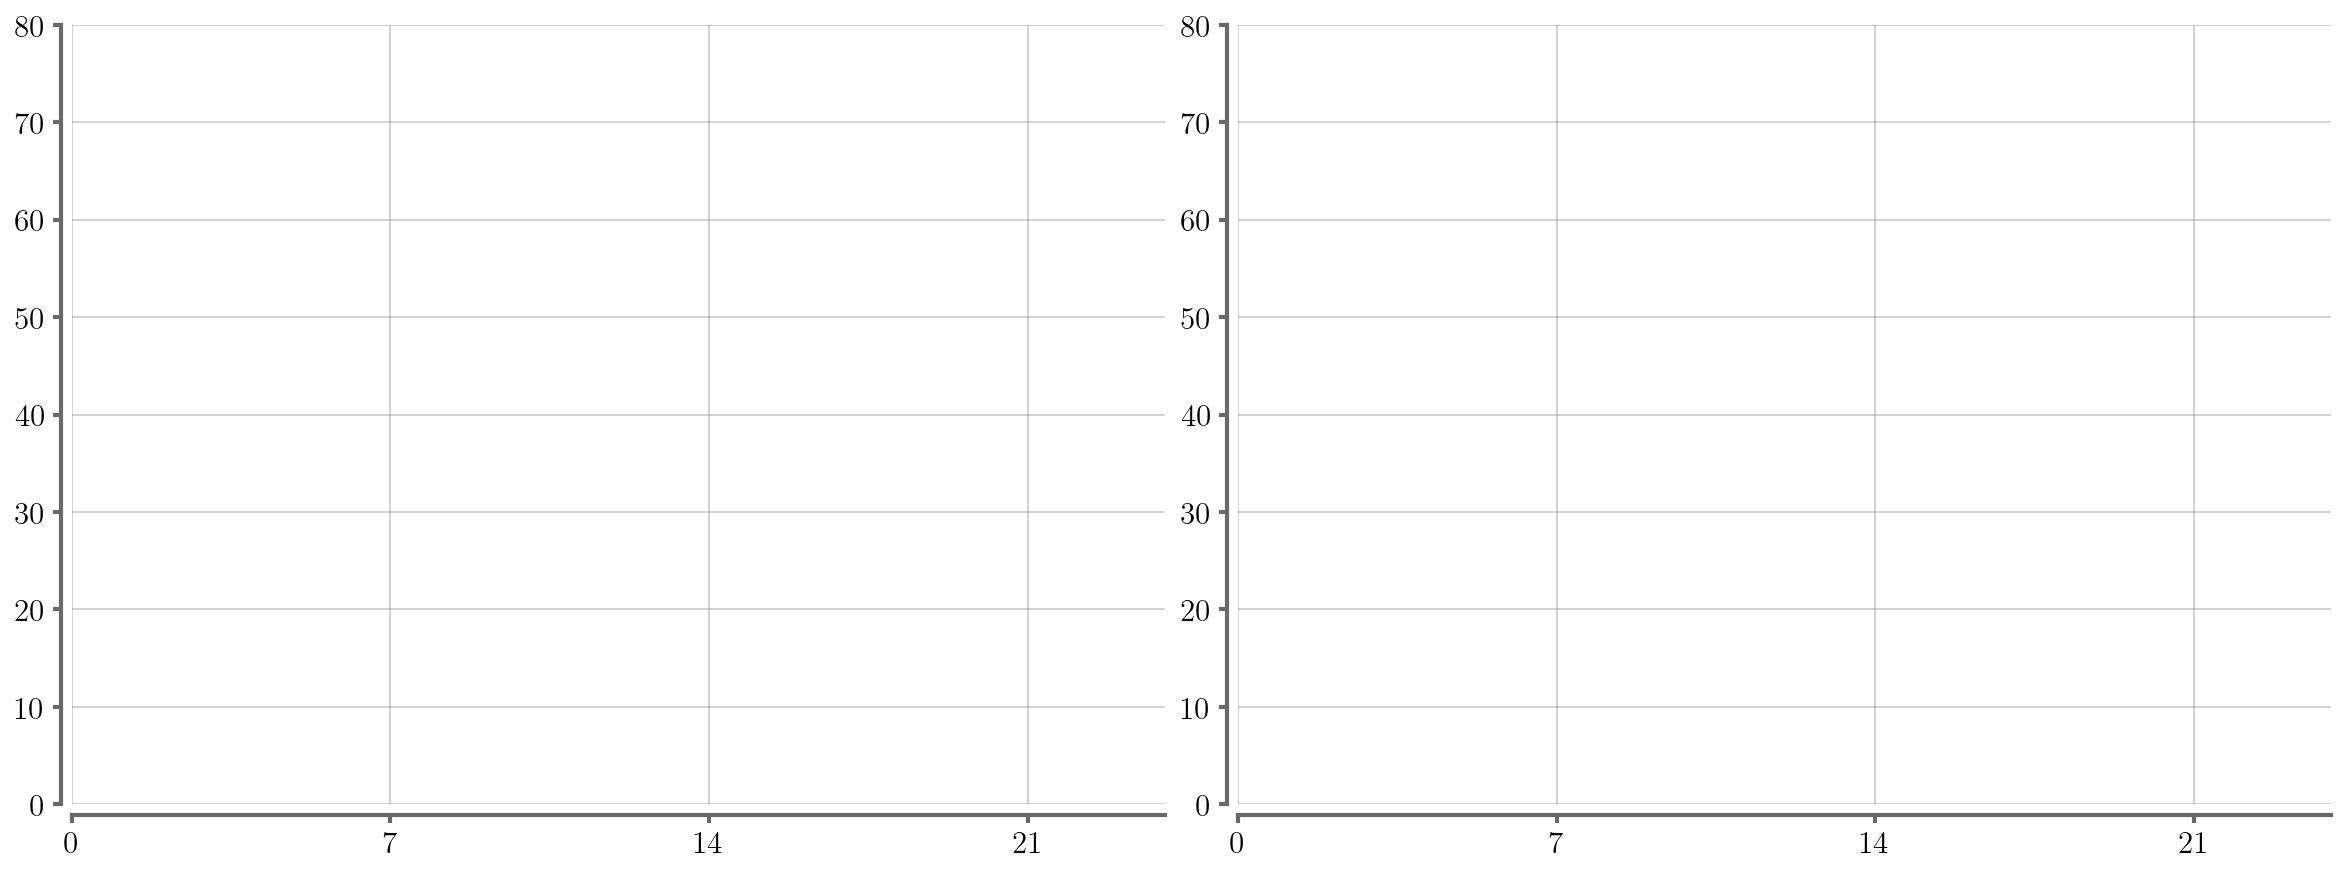

In [17]:
FS = 18
fig = plt.figure(figsize=(16,6))
ax = fig.subplot_mosaic('''
                        BD
                        ''')
plt.tight_layout(w_pad=0)
for loc in ['B','D']:   
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    ax[loc].xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    
    ax[loc].set_ylim(0,80)
    ax[loc].set_yticks(np.arange(0,90,10))
    ax[loc].set_xlim(0,len(LEADS))
    ax[loc].set_xticks(np.arange(0,28,7))
    
    
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_confcorrfracpred_avg[:,0,0]*100,
                 y2 = model1_confcorrfracpred_avg[:,5,0]*100,
                color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,5,0]*100,
#                  y2 = model1_confcorrfracpred_avg[:,12,0]*100,
#                 color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,12,0]*100,
#                  y2 = model1_confcorrfracpred_avg[:,19,0]*100,
#                 color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,19,0]*100,
#                  y2 = model1_confcorrfracpred_avg[:,26,0]*100,
#                 color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,26,0]*100,
#                  y2 = model1_confcorrfracpred_avg[:,29,0]*100,
#                  color='teal', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_confcorrfracpred_avg[:,0,0]*100,
                 y2 = model2_confcorrfracpred_avg[:,5,0]*100,
                 color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,5,0]*100,
#                  y2 = model2_confcorrfracpred_avg[:,12,0]*100,
#                  color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,12,0]*100,
#                  y2 = model2_confcorrfracpred_avg[:,19,0]*100,
#                  color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,19,0]*100,
#                  y2 = model2_confcorrfracpred_avg[:,26,0]*100,
#                  color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')
# ax['B'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,26,0]*100,
#                  y2 = model2_confcorrfracpred_avg[:,29,0]*100,
#                  color='purple', alpha=1.0,linewidth=0)#,label='Days 28-31')


ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model12_confcorrfracpred_avg[:,0,0]*100,
                 y2 = model12_confcorrfracpred_avg[:,5,0]*100,
                color='grey', alpha=0.2,linewidth=0)



ax['B'].set_title('Negative Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['B'].set_yticklabels(np.arange(0,90,10),fontsize=FS,color='dimgrey')
ax['B'].set_ylabel('individual network contribution (\%)',fontsize=FS+1,color='dimgrey')
ax['B'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
ax['B'].set_xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')

ax['B'].legend(frameon=False, fontsize=FS+3,ncol=2,bbox_to_anchor=(1, 1))

#######

ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_confcorrfracpred_avg[:,0,1]*100,
                 y2 = model1_confcorrfracpred_avg[:,5,1]*100,
                color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,5,1]*100,
#                  y2 = model1_confcorrfracpred_avg[:,12,1]*100,
#                 color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,12,1]*100,
#                  y2 = model1_confcorrfracpred_avg[:,19,1]*100,
#                 color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,19,1]*100,
#                  y2 = model1_confcorrfracpred_avg[:,26,1]*100,
#                 color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,26,1]*100,
#                  y2 = model1_confcorrfracpred_avg[:,29,1]*100,
#                  color='teal', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_confcorrfracpred_avg[:,0,1]*100,
                 y2 = model2_confcorrfracpred_avg[:,5,1]*100,
                 color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,5,1]*100,
#                  y2 = model2_confcorrfracpred_avg[:,12,1]*100,
#                  color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,12,1]*100,
#                  y2 = model2_confcorrfracpred_avg[:,19,1]*100,
#                  color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,19,1]*100,
#                  y2 = model2_confcorrfracpred_avg[:,26,1]*100,
#                  color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')
# ax['D'].fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,26,1]*100,
#                  y2 = model2_confcorrfracpred_avg[:,29,1]*100,
#                  color='purple', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model12_confcorrfracpred_avg[:,0,1]*100,
                 y2 = model12_confcorrfracpred_avg[:,5,1]*100,
                 color='grey', alpha=0.2,linewidth=0)

ax['D'].set_title('Positive Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['D'].set_yticklabels(np.arange(0,90,10),fontsize=FS,color='dimgrey')
ax['D'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
ax['D'].set_xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')

ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 2-7', alpha=0.2,linewidth=0)
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 7-14', alpha=0.4,linewidth=0)
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 14-21', alpha=0.6,linewidth=0)
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 21-28', alpha=0.8,linewidth=0)
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 28-30', alpha=1.0,linewidth=0)

ax['D'].legend(frameon=False, fontsize=FS+3,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left",
               title='Z500 Averaging Windows',title_fontsize=FS+4)

# plt.savefig('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/plots/modelcontribution_main.png',dpi=300,bbox_inches='tight')
plt.show()